In [1]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\s

In [2]:
file_name = []
for i in range(56):
    file_name.append('file{0}'.format(i))

def read_split_file(file_name):
    file = open('C:/Users/ehrme/ml/{0}.txt'.format(file_name), 'r', encoding = 'utf-8')
    name = file.read()
    return name

file_list = []
for i in range(56):
    file_list.append(read_split_file(file_name[i]))
print(file_list[0])

Efficient shortest path query answering in large graphs is enjoying a growing number of applications, such as ranked keyword search in databases, social networks, ontology rea- soning and bioinformatics. A shortest path query on a graph finds the shortest path for the given source and target ver- tices in the graph. 
Current techniques for efficient evaluation of such queries are based on the pre-computation of compressed Breadth First Search trees of the graph. However, they suffer from drawbacks of scalability. To address these problems, we pro- pose TEDI, an indexing and query processing scheme for the shortest path query answering. TEDI is based on the tree decomposition methodology. The graph is first decomposed into a tree in which the node (a.k.a. bag) contains more than one vertex from the graph. The shortest paths are stored in such bags and these local paths together with the tree are the components of the index of the graph. Based on this index, a bottom-up operation can be 

### 1. preprocessing

In [3]:
file_name = []
def preprocessing(file_list, remove_stopwords = False):
    file = re.sub('[^a-zA-Z]', ' ', file_list)
    words = file.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        a = ' '.join(words)
    else:
        a = ' '.join(words)
    return a

for i in range(56):
    file_name.append(preprocessing(file_list[i], remove_stopwords = True))

df_file = pd.DataFrame(file_name)
print(df_file.loc[0])

0    efficient shortest path query answering large ...
Name: 0, dtype: object


### 2. Vectorize

In [4]:
#unigram
vectorizer_uni = TfidfVectorizer(max_features = 20, encoding = 'utf-8', analyzer = 'word', min_df = 1)
vectorizer_uni.fit_transform(df_file.loc[i])

#55개 문서 dictionary
tfidf_dicts = []
fit_vector = np.zeros((1, 20), dtype = float)
# 55개 문서에 대한 벡터화 값
for i in range(0, len(df_file)):
    fit_vector = np.vstack([fit_vector, vectorizer_uni.fit_transform(df_file.loc[i]).toarray()])
    tfidf_dicts.append(vectorizer_uni.get_feature_names())

fit_vector = np.delete(fit_vector,[0], axis = 0)

print(fit_vector.shape)
print(tfidf_dicts[0])

(56, 20)
['answering', 'based', 'bfs', 'decomposition', 'graph', 'index', 'large', 'path', 'query', 'results', 'section', 'shortest', 'size', 'space', 'tedi', 'theoretical', 'time', 'tree', 'trees', 'vertices']


In [5]:
#bigram
vectorizer_bi = TfidfVectorizer(max_features = 20, encoding = 'utf-8', analyzer = 'word', 
                                stop_words = 'english', ngram_range = (2,2), min_df = 1)

tfidf_dicts_bi = []
fit_vector_bi = np.zeros((1, 20), dtype = float)
# 55개 문서에 대한 벡터화 값
for i in range(0, len(df_file)):
    fit_vector_bi = np.vstack([fit_vector_bi, vectorizer_bi.fit_transform(df_file.loc[i]).toarray()])
    tfidf_dicts_bi.append(vectorizer_bi.get_feature_names())

fit_vector_bi = np.delete(fit_vector_bi,[0], axis = 0)

print(fit_vector_bi.shape)

(56, 20)


In [6]:
#trigram
vectorizer_tri = TfidfVectorizer(max_features = 20, encoding = 'utf-8', analyzer = 'word', 
                                 stop_words = 'english', ngram_range = (3,3), min_df = 1)

tfidf_dicts_tri = []
fit_vector_tri = np.zeros((1, 20), dtype = float)
# 55개 문서에 대한 벡터화 값
for i in range(0, len(df_file)):
    fit_vector_tri = np.vstack([fit_vector_tri, vectorizer_tri.fit_transform(df_file.loc[i]).toarray()])
    tfidf_dicts_tri.append(vectorizer_tri.get_feature_names())

fit_vector_tri = np.delete(fit_vector_tri,[0], axis = 0)

print(len(tfidf_dicts_tri))

56


In [7]:
# 55개 문서 ubt 합친 60개 dictionary, string으로
ubt_array = []
ubt_list = []
for i in range(len(df_file)):
    globals()['ubt_dict{0}'.format(i)] = tfidf_dicts[i] + tfidf_dicts_bi[i] + tfidf_dicts_tri[i]
    ubt_array.append(globals()['ubt_dict{0}'.format(i)])
    ubt_list.append(' '.join(globals()['ubt_dict{0}'.format(i)]))
print(ubt_list[0])
print(ubt_array[0])

answering based bfs decomposition graph index large path query results section shortest size space tedi theoretical time tree trees vertices bfs tree bfs trees compact bfs conduct experiments decomposition algorithm efficiency query experimental results great importance improvement existing index size keyword search large graphs path query query answering query time ranked keyword shortest path shortest paths theoretical results tree decomposition compact bfs trees data ranked keyword datasets rest paper dblp road networks given source target introduce formal definitions magnitude performance improvement paper organized follows path given source path query answering prove theoretical results query answering section ranked keyword search related works section shortest path problem shortest path query tedi offers orders tedi scales large theoretical results regarding tree decomposition algorithm
['answering', 'based', 'bfs', 'decomposition', 'graph', 'index', 'large', 'path', 'query', 'r

In [8]:
#ubt_df = 전체 문서의 uni+bi+tri와 각 문서의 벡터화된 값의 데이터프레임
ubt_vector = np.zeros((1, 20), dtype = float)

ubt_vector = np.vstack([ubt_vector, fit_vector])
ubt_vector = np.delete(ubt_vector,[0], axis = 0)
ubt_vector = np.hstack([ubt_vector, fit_vector_bi])
ubt_vector = np.hstack([ubt_vector, fit_vector_tri])

print(ubt_vector[:55].shape)

(55, 60)


### 3. k-means clustering

In [39]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10).fit(ubt_vector[:55])
labels = list(kmeans.labels_)
clustering = pd.DataFrame({'ubt_list': ubt_list[:55], 'class': kmeans.labels_})
#print(clustering)
print(kmeans.labels_)

[1 0 6 2 0 2 3 0 0 2 0 2 1 5 7 0 6 0 6 0 2 0 6 7 6 2 4 2 6 9 0 0 0 0 1 2 2
 8 0 2 1 0 8 1 1 0 0 0 2 5 7 2 2 7 9]


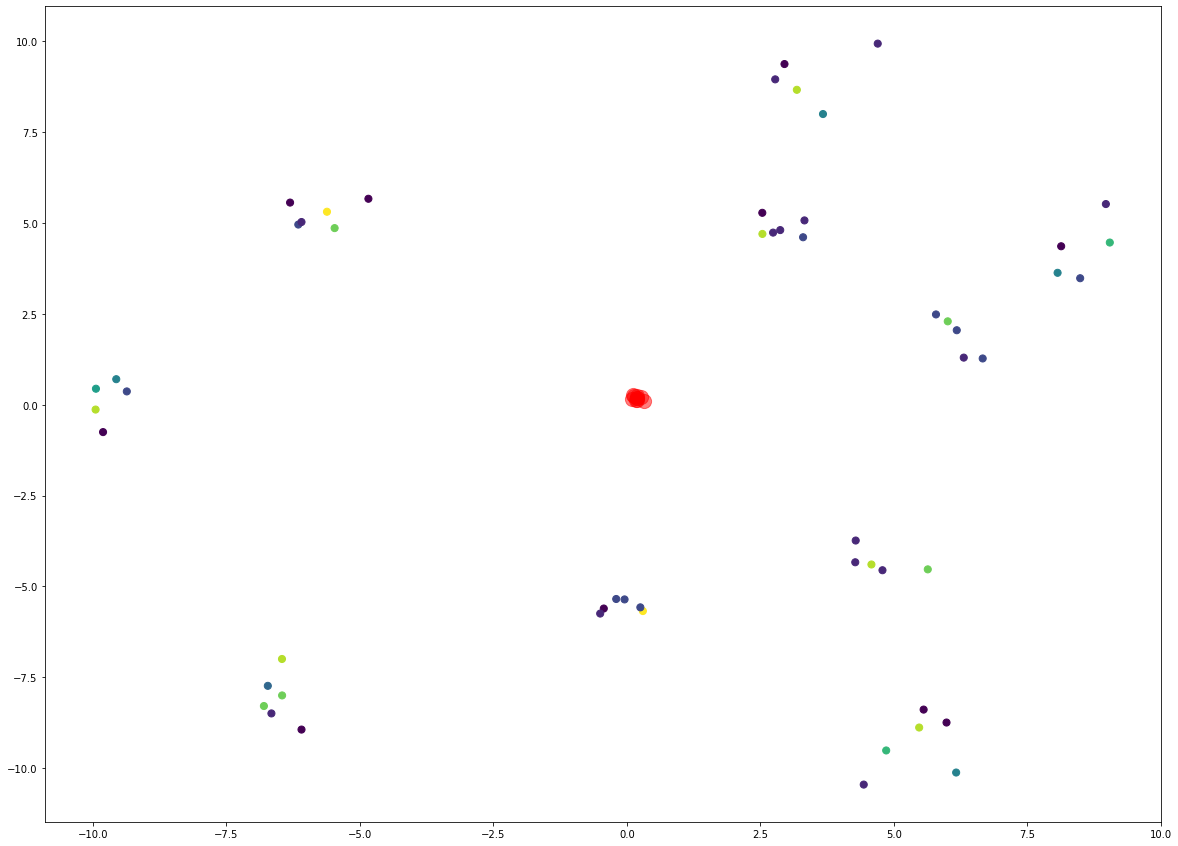

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = len(ubt_list[:55]), centers=10,
                       cluster_std=0.50, random_state = 10)
plt.figure(figsize = (20, 15))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

plt.savefig('clustering.png')

### 4. Similarity

#### 4-1. 비교파일 가져오기

In [19]:
from numpy import dot
from numpy.linalg import norm
import math
from pyjarowinkler import distance

#코사인 유사도
def Cos_sim(doc1, doc2):
    return dot(doc1, doc2)/(norm(doc1)*norm(doc2))

def Jaccard_sim(doc1, doc2):
    doc1 = set(doc1)
    doc2 = set(doc2)
    return len(doc1 & doc2) / len(doc1 | doc2)

def Manhattan_sim(doc1, doc2):
    return 1/ (1 + (sum(abs(a-b) for a,b in zip(doc1, doc2))))

def Euclidean_distance(doc1, doc2):
    return 1/ (1+ math.sqrt(sum(pow(a-b,2) for a, b in zip(doc1, doc2))))

cos = []
jaccard = []
man = []
euc = []

for i in range(56):
    cos.append(Cos_sim(ubt_vector[i], ubt_vector[55]))
    jaccard.append(Jaccard_sim(ubt_array[i], ubt_array[55]))
    man.append(Manhattan_sim(ubt_vector[i], ubt_vector[55]))
    euc.append(Euclidean_distance(ubt_vector[i], ubt_vector[55]))
    
print(cos)
print(jaccard)
print(man)
print(euc)

[0.7956233369014464, 0.8052782041453079, 0.8038269300348283, 0.8647271629098376, 0.827275265893008, 0.8058526549142992, 0.7950441399118741, 0.8799921791143105, 0.8675614204557532, 0.8103801405901622, 0.800954822251908, 0.8341117181308486, 0.8360610954696771, 0.7998875714643021, 0.7960658077171603, 0.8201473914155684, 0.8604999467896153, 0.793688180081453, 0.812016909058173, 0.8562326703436988, 0.8421628767821383, 0.8191501492884878, 0.8205963162093185, 0.7368338991208178, 0.7742926647524473, 0.7454576386837446, 0.71738960026303, 0.8746524728750789, 0.7413244740428824, 0.7883904660170874, 0.8895034668308989, 0.8749572489557355, 0.8454695050043332, 0.8575983682332369, 0.8881705561842769, 0.8357612058951738, 0.8111397251711165, 0.8238985344692256, 0.8056865920093347, 0.7974074403206154, 0.8834108332789441, 0.8384766629259517, 0.8241065604040172, 0.7852189998464807, 0.838640241315799, 0.8580445406165637, 0.8327215859633388, 0.793761556705687, 0.8857117334194059, 0.7898797852615018, 0.79375

### pd 생성

In [42]:
import pandas as pd
pds = pd.DataFrame({"unigram":tfidf_dicts})
pds["bigram"] = pd.DataFrame({"bigram":tfidf_dicts_bi})
pds["trigram"] = pd.DataFrame({"trigram":tfidf_dicts_tri})
pds["uni+bi+tri"] = pd.DataFrame({"uni+bi+tri":ubt_list})
pds["cosine similarity"] = pd.DataFrame({"cosine similarity":cos})
pds["jaccard similarity"] = pd.DataFrame({"jaccard similarity":jaccard})
pds["manhattan similarity"] = pd.DataFrame({"manhattan similarity":man})
pds["euclidean similarity"] = pd.DataFrame({"euclidean similarity":euc})
pds["kmeans"] = pd.DataFrame({"kmeans":labels[:55]})

In [44]:
print(pds)
pds.to_csv('data.csv', encoding = 'utf-8')

                                              unigram  \
0   [answering, based, bfs, decomposition, graph, ...   
1   [based, cluster, clustering, clusters, data, d...   
2   [algorithms, bottlenecks, code, data, differen...   
3   [ckg, cluster, clusters, discover, discovering...   
4   [analytics, based, data, hadoop, incremental, ...   
5   [analysis, analyst, analysts, analytics, data,...   
6   [best, community, degree, example, find, given...   
7   [based, cm, count, data, distributed, ecm, err...   
8   [algorithm, algorithms, based, dimensional, lo...   
9   [algorithm, branch, continuous, efficiency, ef...   
10  [access, based, communication, cost, data, dif...   
11  [analysis, application, cache, cluster, data, ...   
12  [based, cell, data, dimensional, grid, high, i...   
13  [also, client, conversion, data, database, emp...   
14  [advanced, analysis, architecture, based, capa...   
15  [apollo, cache, caching, client, clients, data...   
16  [anomalies, cep, cluster, d